In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

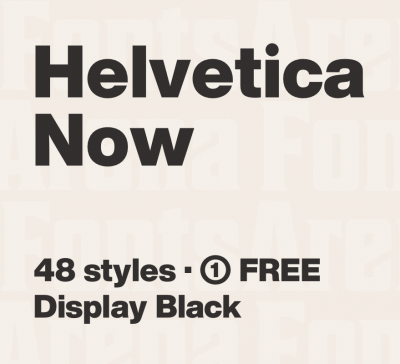

(364, 400, 3)

In [3]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)
image.shape
#print(image)

In [0]:
edges = cv2.Canny(image,100,200)

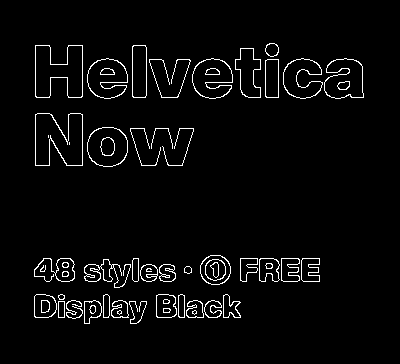

In [5]:
cv2_imshow(edges)

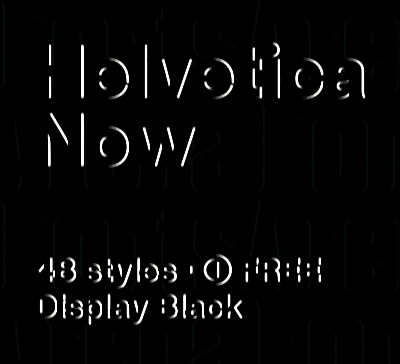

In [6]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)


###Horizontal Edge Detector



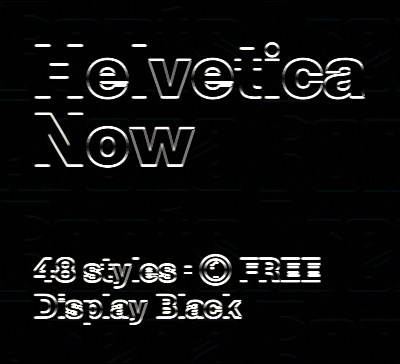

In [12]:
#This is detecting the type of edge wherein the color is changing from light to dark
kernel_light_to_dark = np.float32([[1,1,1],[0,0,0],[-1,-1,-1]])
dst_light_to_dark = cv2.filter2D(image,-1,kernel_light_to_dark)


#This is detecting the type of edge wherein the color is changing from dark to light
kernel_dark_to_light = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])
dst_dark_to_light = cv2.filter2D(image,-1,kernel_dark_to_light)

#Adding them both together to get all horizontal edges
cv2_imshow(dst_light_to_dark + dst_dark_to_light)


##45 Degree Angle Detector

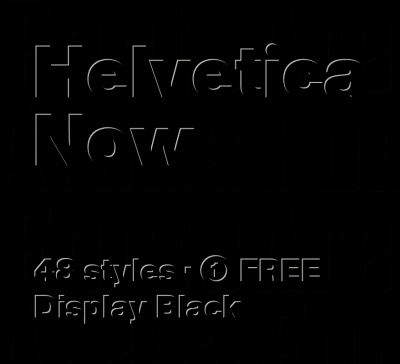

In [18]:
kernel = np.float32([[1,0],[0,-1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

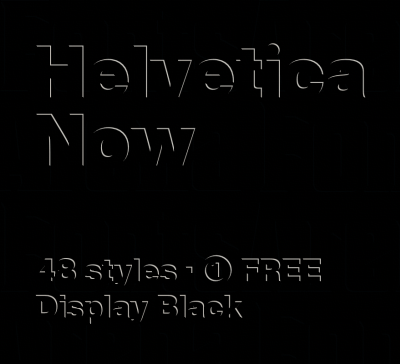

In [19]:
kernel = np.float32([[0,1],[-1,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

##Blur
We blur by averaging the pixel values of the intended pixel and those around it

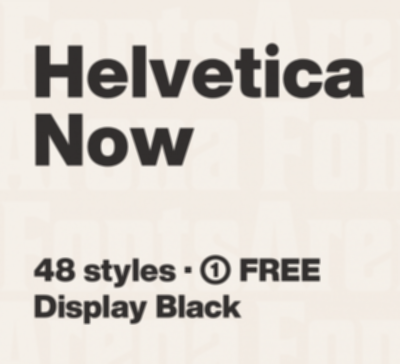

In [0]:
kernel = np.ones((3,3),np.float32)/9
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

##Sharpen

Sharpen means amplify the magnitude of the pixel as compared to those around it.
In this case, we supress those around the center pixel(by multiplying with negative number) and enhance the center pixel by multiplying with positive number

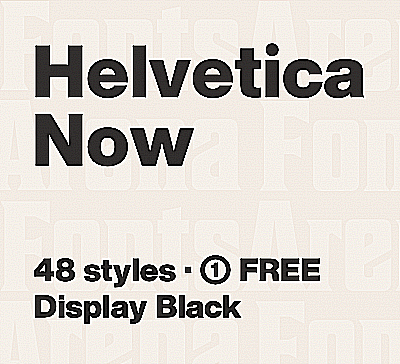

In [0]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

##Identity function

The kernel should operate only on the pixel and leave its value unchanged while it should ignore values of surrounding pixels


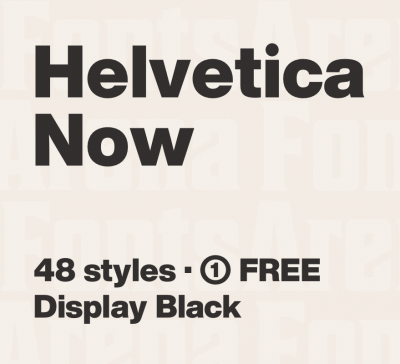

In [0]:
kernel = np.array([[0,0,0], [0,1,0], [0,0,0]])
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)